In [1]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package

# Gnostic Decision Tree Classifier

### **Overview**
The **Machine Gnostics Decision Tree Classifier** provides a robust implementation of the classical decision tree algorithm, enhanced with **Gnostic Weighted Learning**. This approach automatically identifies and adapts to outliers and noisy/mislabeled data during the training process.

Key advantages:
- **Robustness to Outliers**: Gnostic weights down-weight anomalous samples.
- **Iterative Refinement**: The model improves its resistance to noise over several gnostic iterations.
- **Interpretable Weights**: Sample weights provide insight into data quality and difficulty.
- **Convergence Tracking**: History of loss and weights allows monitoring of the stabilization process.

---

### **Theoretical Background**

The Gnostic Decision Tree operates by iteratively fitting a tree and updating sample weights based on the **Thermodynamic Gnostic Entropy** of the residuals (misclassifications).

1.  **Initial Fit**: A standard tree is fit to the data.
2.  **Weight Update**: Samples that are misclassified or have high uncertainty receive lower gnostic weights.
3.  **Refitting**: The tree is retrained on the weighted data.
4.  **Convergence**: This cycle repeats until the weights and model parameters stabilize (Ideal Gnostic Cycle).

***

## Example 1: Basic Classification

A simple example showing how to use the Gnostic Decision Tree on a synthetic dataset.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from machinegnostics.models import GnosticDecisionTreeClassifier, train_test_split
from machinegnostics.metrics import accuracy_score, classification_report, confusion_matrix
from machinegnostics.data import make_classification_check_data

# Generate synthetic data
X, y = make_classification_check_data(
    n_samples=300, 
    n_features=2, 
    n_classes=2, 
    separability=1.0,
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_seed=42)

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Dataset: 300 samples, 2 features
Train set: 210 samples
Test set: 90 samples


In [4]:
# Initialize and train Gnostic Decision Tree
model = GnosticDecisionTreeClassifier(
    max_depth=5,
    gnostic_weights=True,
    max_iter=10,
    tolerance=1e-2,
    verbose=True
)

print("Training Gnostic Decision Tree...")
model.fit(X_train, y_train)

print(f"\nModel trained!")
print(f"Iterations run: {model._iter}")
try:
    print(f"Final loss: {model.cross_entropy_loss:.6f}")
except:
    pass

2026-02-03 17:04:30,049 | GnosticDecisionTreeClassifier | INFO | GnosticDecisionTreeClassifier initialized.
2026-02-03 17:04:30,050 | GnosticDecisionTreeClassifier | INFO | HistoryCartClassifierBase initialized.
2026-02-03 17:04:30,051 | GnosticDecisionTreeClassifier | INFO | Starting fit process for GnosticDecisionTreeClassifier.
2026-02-03 17:04:30,051 | GnosticDecisionTreeClassifier | INFO | Starting fit input/output processing.
2026-02-03 17:04:30,052 | GnosticDecisionTreeClassifier | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-02-03 17:04:30,052 | GnosticDecisionTreeClassifier | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-02-03 17:04:30,053 | GnosticDecisionTreeClassifier | INFO | Checking target y of type: <class 'numpy.ndarray'>
2026-02-03 17:04:30,054 | GnosticDecisionTreeClassifier | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-02-03 17:04:30,055 | GnosticDecisionTreeClassifier | INFO | Starting

Training Gnostic Decision Tree...

Model trained!
Iterations run: 3


In [5]:
# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Metrics
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print("Model Performance:")
print("=" * 50)
print(f"Training Accuracy: {acc_train:.4f}")
print(f"Test Accuracy:     {acc_test:.4f}")
print("=" * 50)

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

2026-02-03 17:04:30,080 | GnosticDecisionTreeClassifier | INFO | Making predictions with GnosticDecisionTreeClassifier.
2026-02-03 17:04:30,082 | GnosticDecisionTreeClassifier | INFO | Starting predict input/output processing.
2026-02-03 17:04:30,082 | GnosticDecisionTreeClassifier | INFO | Checking input X for prediction of type: <class 'numpy.ndarray'>
2026-02-03 17:04:30,083 | GnosticDecisionTreeClassifier | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-02-03 17:04:30,083 | GnosticDecisionTreeClassifier | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-02-03 17:04:30,084 | GnosticDecisionTreeClassifier | INFO | Making predictions with GnosticDecisionTreeClassifier.
2026-02-03 17:04:30,085 | GnosticDecisionTreeClassifier | INFO | Starting predict input/output processing.
2026-02-03 17:04:30,085 | GnosticDecisionTreeClassifier | INFO | Checking input X for prediction of type: <class 'numpy.ndarray'>
2026-02-03 17:04:30,085 | GnosticDecision

Model Performance:
Training Accuracy: 0.9667
Test Accuracy:     0.9556

Classification Report (Test):
Class           Precision    Recall  F1-score   Support
0                    0.93      0.98      0.95        41
1                    0.98      0.94      0.96        49
Avg/Total            0.96      0.96      0.96        90



### Visualization: Decision Boundaries

2026-02-03 17:04:30,100 | GnosticDecisionTreeClassifier | INFO | Making predictions with GnosticDecisionTreeClassifier.
2026-02-03 17:04:30,100 | GnosticDecisionTreeClassifier | INFO | Starting predict input/output processing.
2026-02-03 17:04:30,101 | GnosticDecisionTreeClassifier | INFO | Checking input X for prediction of type: <class 'numpy.ndarray'>
2026-02-03 17:04:30,101 | GnosticDecisionTreeClassifier | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-02-03 17:04:30,101 | GnosticDecisionTreeClassifier | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>


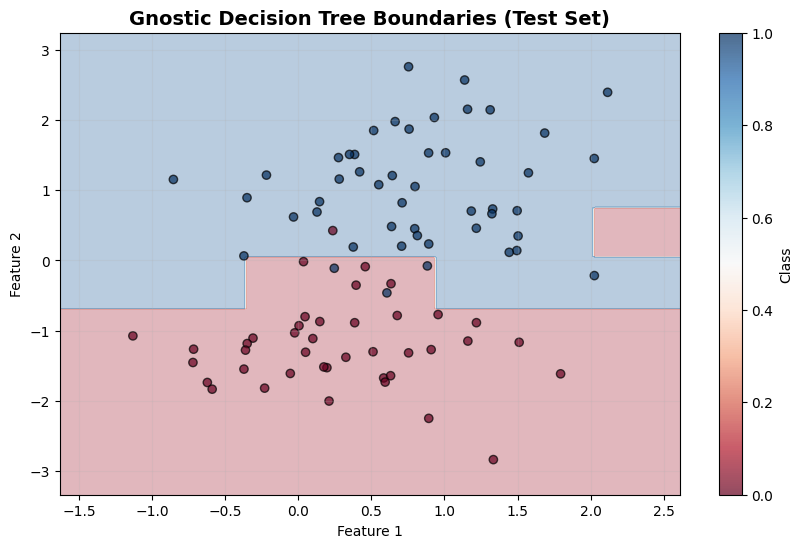

In [6]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', alpha=0.7)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(scatter, label='Class')
    plt.grid(True, alpha=0.2)
    plt.show()

plot_decision_boundary(model, X_test, y_test, "Gnostic Decision Tree Boundaries (Test Set)")

## Example 2: Understanding Gnostic Weights

The model assigns lower weights to samples that are hard to classify or inconsistent with the majority pattern (outliers/noise).

Gnostic Weights Statistics:
----------------------------------------
Mean weight: 1.0000
Min weight:  0.0000
Max weight:  1.0825
Std weight:  0.2872


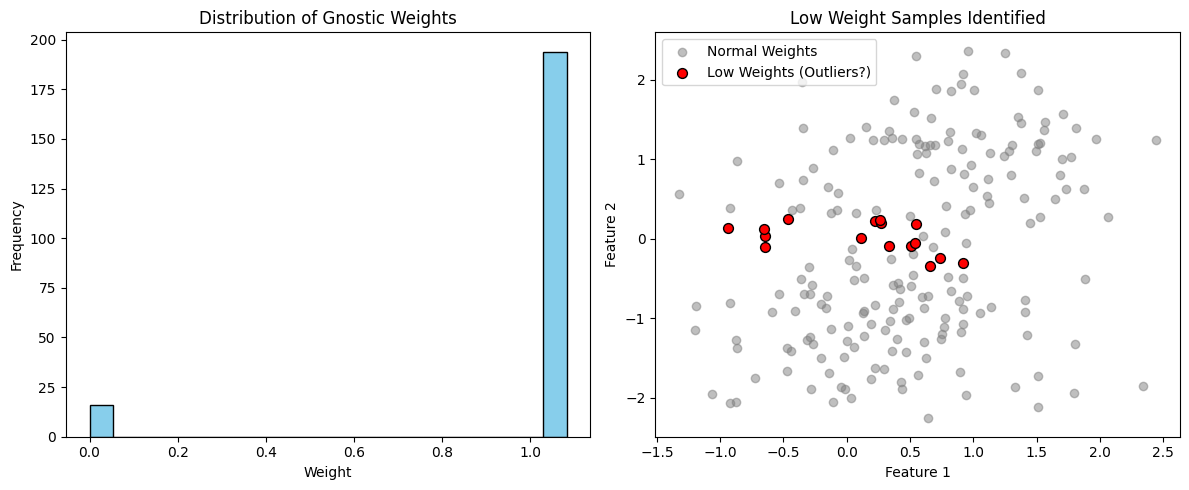

In [7]:
# Inspect Weights
weights = model.weights

print("Gnostic Weights Statistics:")
print("-" * 40)
print(f"Mean weight: {np.mean(weights):.4f}")
print(f"Min weight:  {np.min(weights):.4f}")
print(f"Max weight:  {np.max(weights):.4f}")
print(f"Std weight:  {np.std(weights):.4f}")

# Visualize weights distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(weights, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Gnostic Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Visualize low-weight samples
# We'll highlight the samples with the lowest 10% weights
threshold = np.percentile(weights, 10)
low_weight_mask = weights < threshold

plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c='gray', alpha=0.5, label='Normal Weights')
plt.scatter(X_train[low_weight_mask, 0], X_train[low_weight_mask, 1], c='red', s=50, edgecolors='k', label='Low Weights (Outliers?)')
plt.title('Low Weight Samples Identified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

## Model History

Tracking how the loss improves over gnostic iterations.

In [8]:
model._history

[{'iteration': 0, 'h_loss': None, 'rentropy': None, 'weights': None},
 {'iteration': 1,
  'h_loss': np.float64(203.2926856096815),
  'rentropy': np.float64(0.9399005577837617),
  'weights': array([1.08247037e+00, 1.08247037e+00, 4.33043459e-05, 1.08247037e+00,
         1.08247037e+00, 1.08247037e+00, 1.08247037e+00, 1.08247037e+00,
         1.08247037e+00, 1.08247037e+00, 4.33043459e-05, 1.08247037e+00,
         1.08247037e+00, 1.08247037e+00, 1.08247037e+00, 1.08247037e+00,
         1.08247037e+00, 1.08247037e+00, 4.33043459e-05, 1.08247037e+00,
         2.00982369e-04, 1.08247037e+00, 1.08247037e+00, 1.08247037e+00,
         1.08247037e+00, 4.33090502e-08, 1.08247037e+00, 1.08247037e+00,
         1.08247037e+00, 1.08247037e+00, 1.08247037e+00, 1.08247037e+00,
         1.08247037e+00, 1.08247037e+00, 1.08247037e+00, 1.08247037e+00,
         1.08247037e+00, 1.08247037e+00, 1.08247037e+00, 1.08247037e+00,
         1.08247037e+00, 1.08247037e+00, 1.08247037e+00, 1.08247037e+00,
         

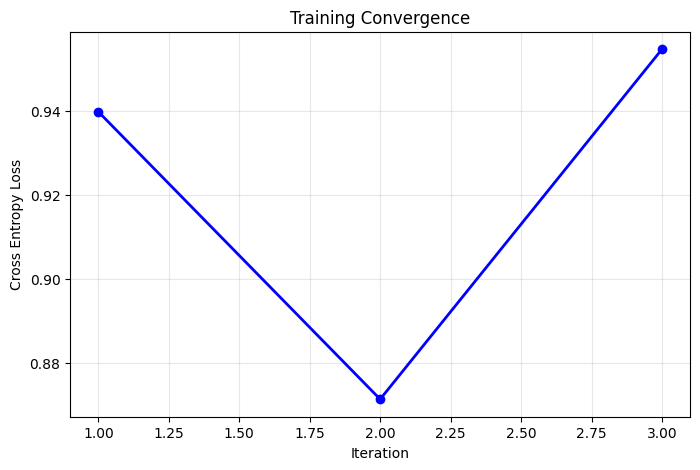

Evolution of metrics:
Iter 0: Loss = None
Iter 1: Loss = 0.9399005577837617
Iter 2: Loss = 0.8713909084494392
Iter 3: Loss = 0.9547964136863226


In [9]:
history = model._history

if len(history) > 1:
    iterations = [h['iteration'] for h in history if h['iteration'] is not None]
    
    losses = [h.get('rentropy', np.nan) for h in history if h['iteration'] is not None]
    
    plt.figure(figsize=(8, 5))
    plt.plot(iterations, losses, 'b-o', linewidth=2)
    plt.title('Training Convergence')
    plt.xlabel('Iteration')
    plt.ylabel('Cross Entropy Loss')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("Evolution of metrics:")
    for i, loss in zip(iterations, losses):
        print(f"Iter {i}: Loss = {loss}")
else:
    print("Model converged in 1 iteration or history not available.")